<a href="https://colab.research.google.com/github/vachaspathi6/Techno_Hacks/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction**

**Introduction: Churn Prediction Analysis**

Churn prediction is a crucial aspect of customer retention strategies for businesses. The ability to identify customers who are likely to leave a company can enable proactive measures to reduce churn, retain valuable customers, and enhance overall business success. In this analysis, we will explore a dataset containing customer information and build a predictive model to identify customers who are most likely to churn.

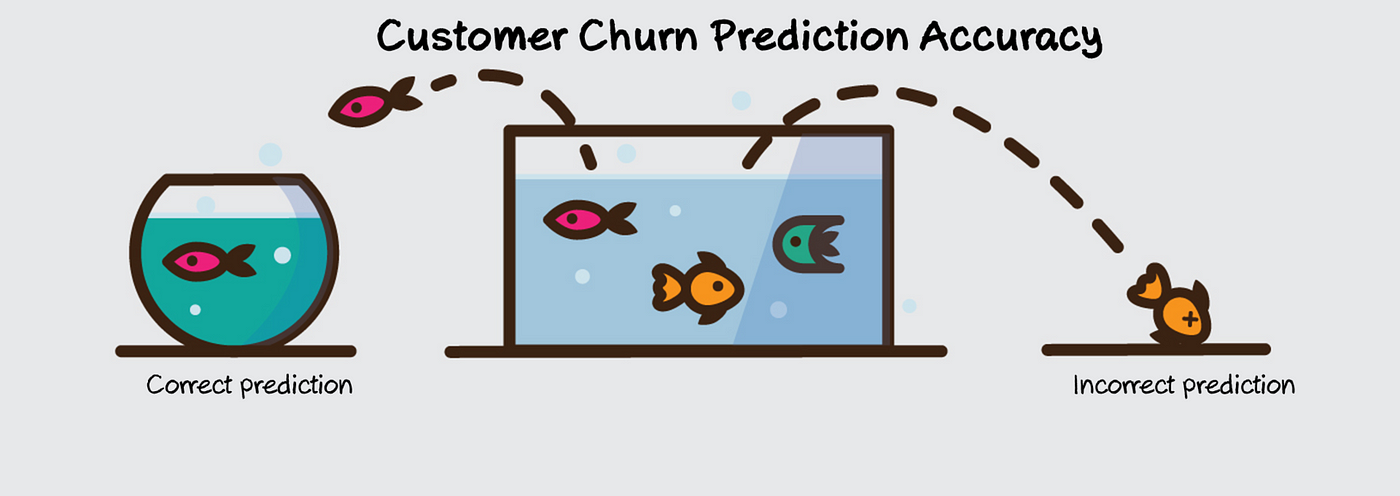

The dataset includes various features that capture key aspects of customer behavior and demographics. These features encompass factors such as gender, senior citizen status, partner and dependent relationships, tenure, phone service usage, internet services, online security, payment methods, and more. The target variable, "Churn," indicates whether a customer has churned or not.

The primary objectives of this analysis are as follows:

**Exploratory Data Analysis (EDA):** We will begin by examining the dataset's structure, data types, and summary statistics. Exploring the distribution of the target variable, "Churn," and visualizing the distributions of other relevant features will provide initial insights into the data.

**Data Preprocessing:** To prepare the data for modeling, we will encode categorical variables, split the dataset into features and the target variable, and further divide the data into training and testing sets.

**Model Building:** Using a Random Forest Classifier, we will construct a predictive model that learns patterns in the data to predict customer churn. This model will be trained on a subset of the data and evaluated on a separate test set.

**Model Evaluation:** We will assess the model's performance using metrics such as confusion matrix, precision, recall, and F1-score. This evaluation will help us understand the model's ability to correctly predict customer churn.

**Feature Importance:** By analyzing the feature importance scores provided by the model, we can identify which customer attributes have the most significant impact on predicting churn. This insight can guide business decisions aimed at improving customer retention.

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

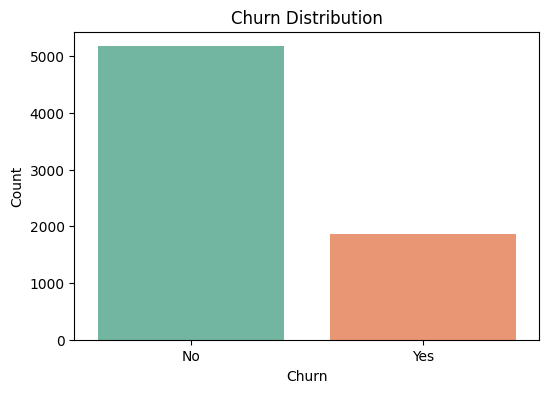

Confusion Matrix:
 [[943  93]
 [193 180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("Telco-Customer-Churn.csv")  # Replace with your actual dataset

# Exploratory Data Analysis
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset (data types, missing values, etc.)

# Visualize Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split dataset into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


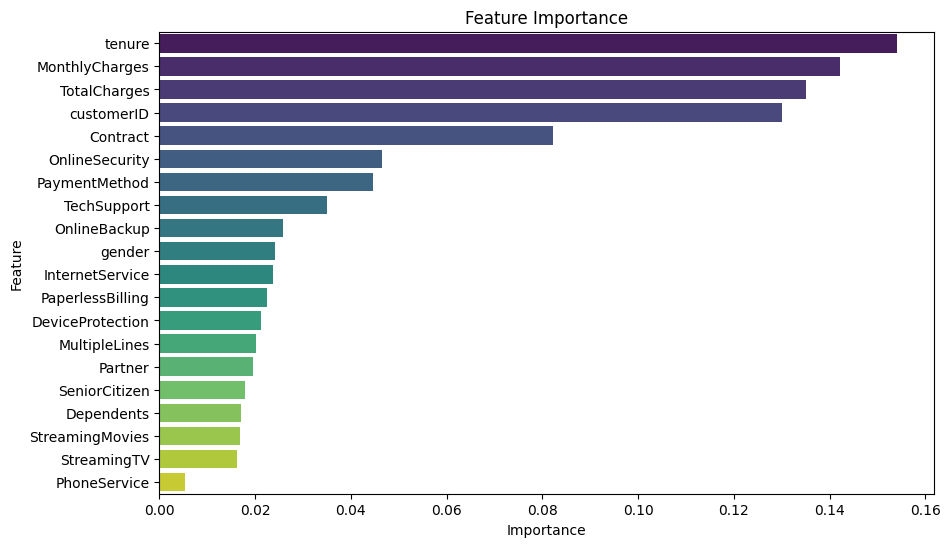

In [5]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

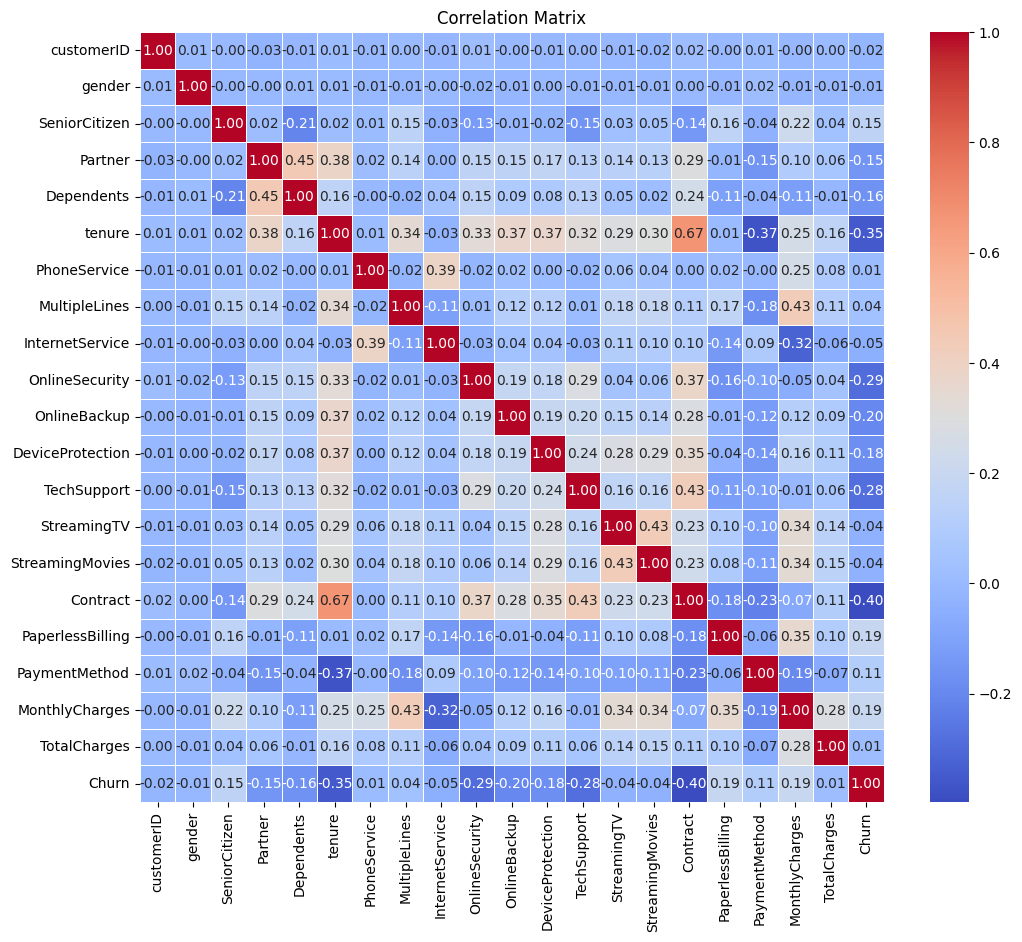

In [7]:
numeric_variables = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_variables.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**1)What is the most paymentmethod customers use to pay?**

<Axes: >

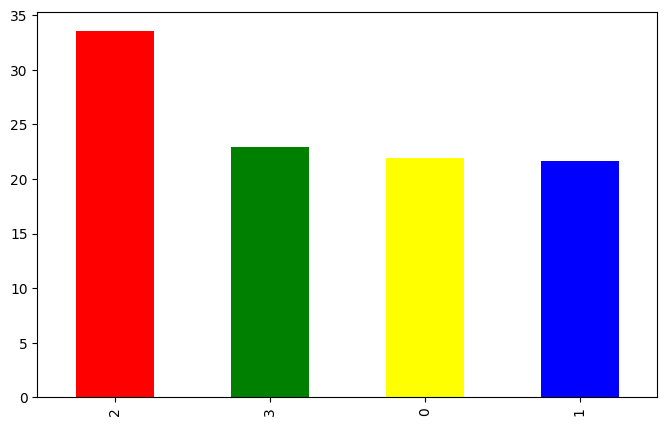

In [10]:
plt.figure(figsize=(8,5))
round(data['PaymentMethod'].value_counts()/data.shape[0]*100,2).plot.bar( color = ['red' , 'green' , 'yellow' , 'blue'])

**2)what is the ratio between male and female customers in our company?**

<Axes: ylabel='gender'>

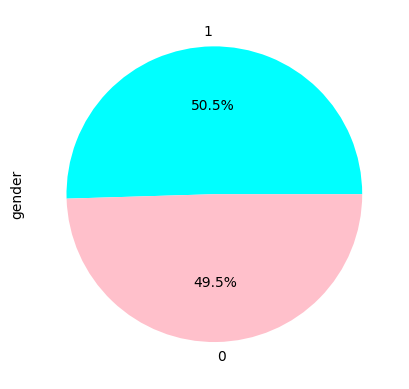

In [13]:
round(data['gender'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", colors = ['aqua','pink'])

**3)Does the techsupport affects the device protection for the users?**

<Axes: xlabel='TechSupport', ylabel='count'>

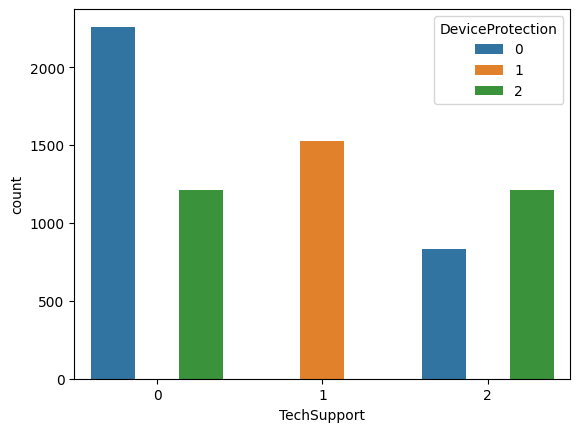

In [14]:
sns.countplot(data=data,x='TechSupport',hue='DeviceProtection')


**4) Does the MonthlyCharges affects the churn?**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

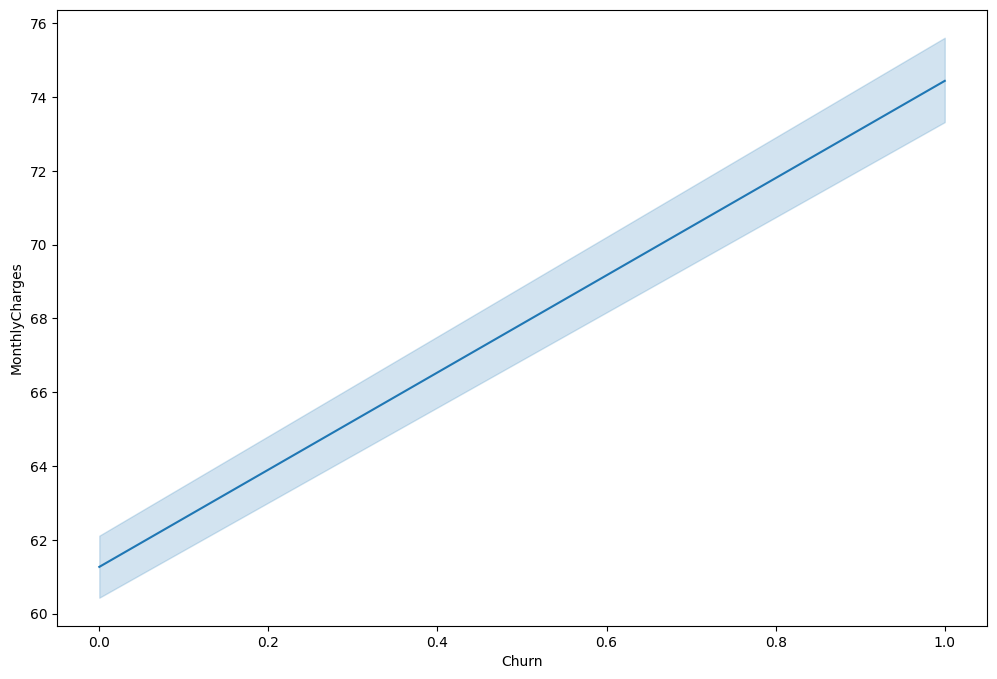

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(y="MonthlyCharges",x='Churn',data=data)

**5)Does the number of tenures affects MultipleLines?**

<Axes: xlabel='tenure', ylabel='MultipleLines'>

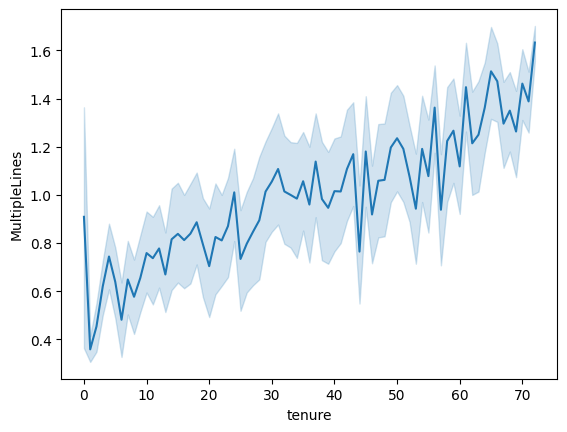

In [17]:
sns.lineplot(y="MultipleLines",x='tenure',data=data)

**6)How does the cost of acquiring new customers compare to the cost of retaining existing customers, and what is the financial impact of customer churn on the telco company?**

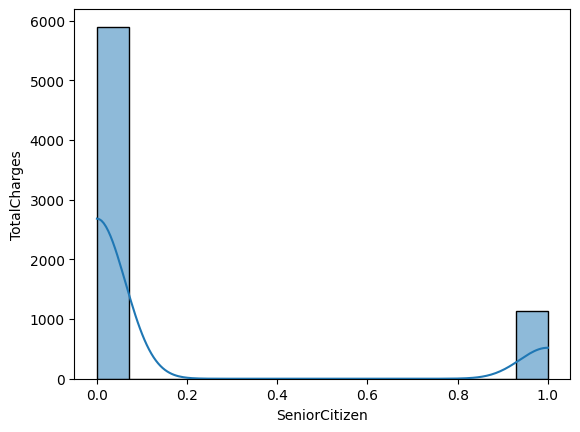

In [19]:
sns.histplot(data['SeniorCitizen'], bins='auto',kde=True)
plt.ylabel('TotalCharges')
plt.show()

**7)Are there any billing or payment-related factors that contribute to churn?**

<Axes: xlabel='Churn', ylabel='count'>

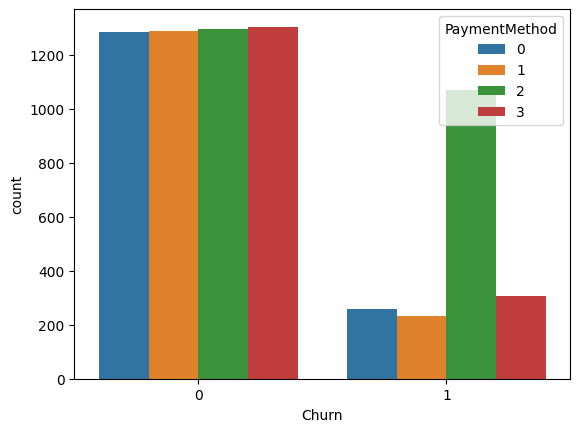

In [20]:
sns.countplot(data=data , x="Churn", hue="PaymentMethod")

**8)Is there any patterns in Churn Customers based on the gender?**

<Axes: xlabel='Churn', ylabel='Count'>

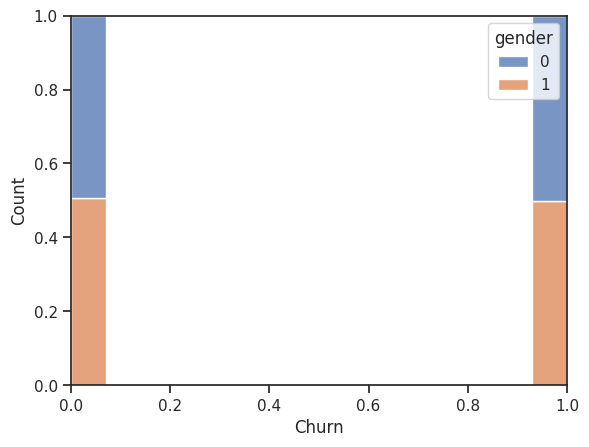

In [21]:
sns.set_theme(style="ticks")
sns.histplot(data= data,x="Churn", hue="gender",multiple="fill")

**9)Is there a relation between the contract type and the method of payment?**

<Axes: xlabel='Contract', ylabel='count'>

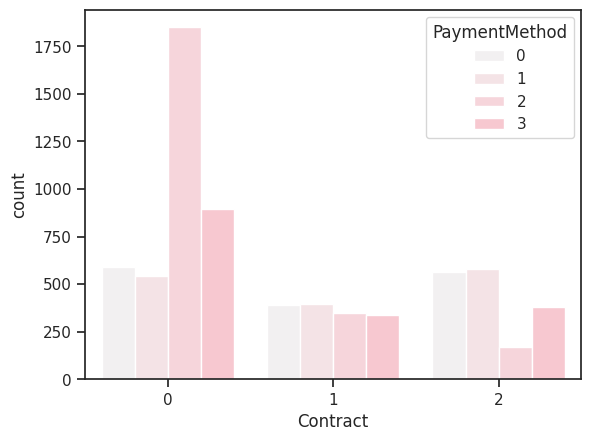

In [22]:
sns.countplot(data = data, x ='Contract', hue ='PaymentMethod', color='pink')


**10) The relation between the seniors and payment.**

<Axes: xlabel='SeniorCitizen', ylabel='PaymentMethod'>

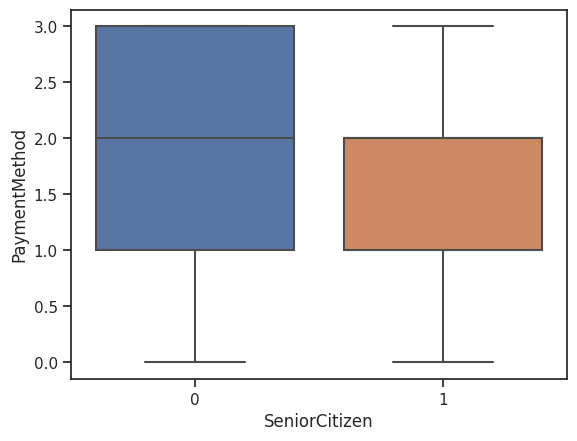

In [24]:
sns.boxplot(data=data,x='SeniorCitizen',y='PaymentMethod')

**10)The relation between streaming tv and the internet service**


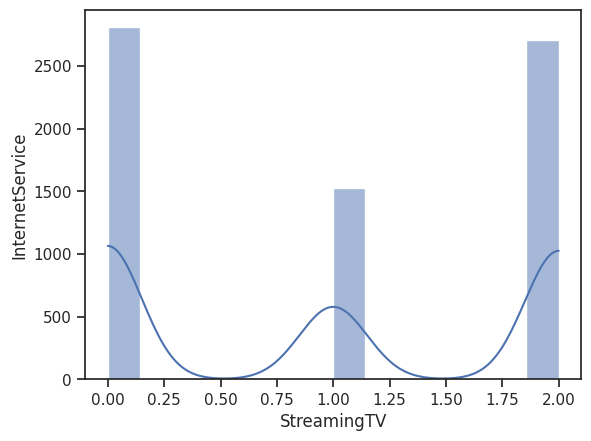

In [25]:
sns.histplot(data['StreamingTV'], bins='auto', kde=True )
plt.ylabel('InternetService')
plt.show()

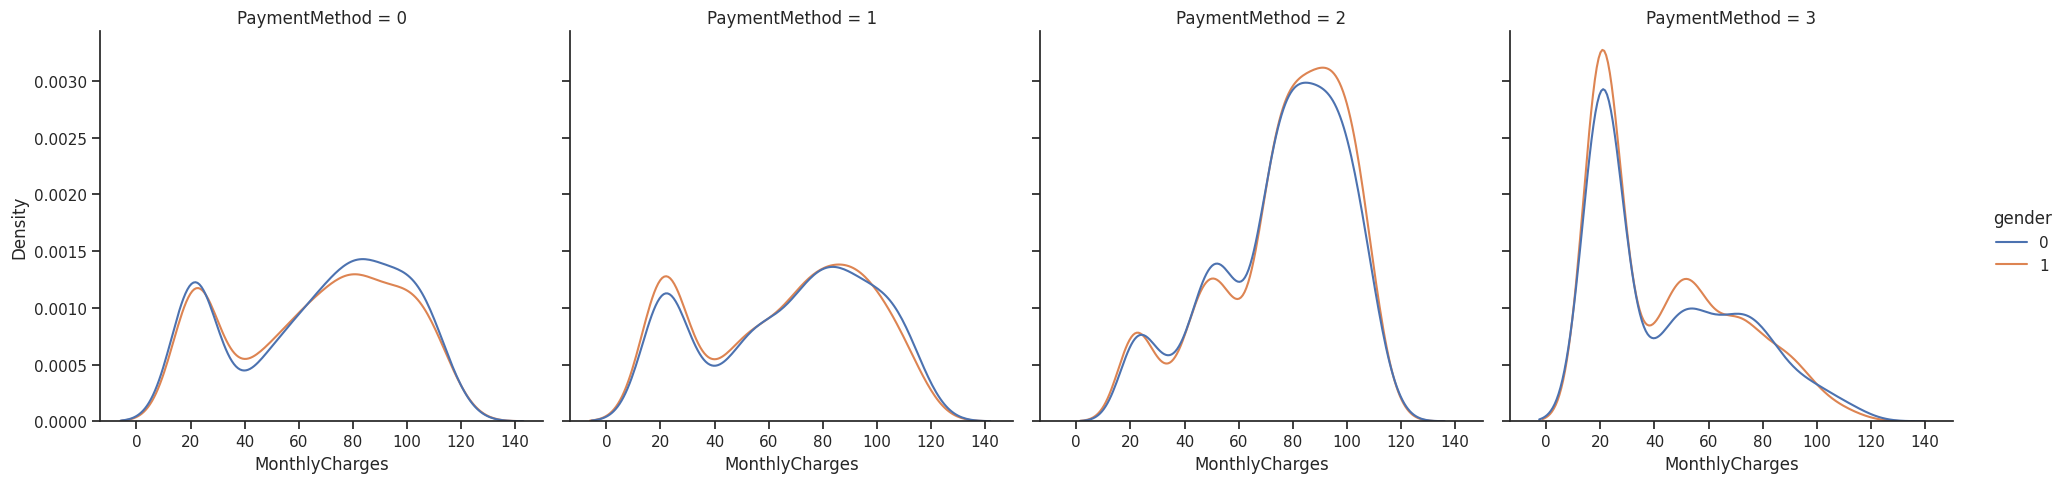

In [79]:
sns.displot(data=data, x="MonthlyCharges", hue = "gender", col="PaymentMethod", kind = "kde") # Plotting the figure level of distribution of data

Text(0.5, 1.0, 'MonthlyCharges vs TotalCharges')

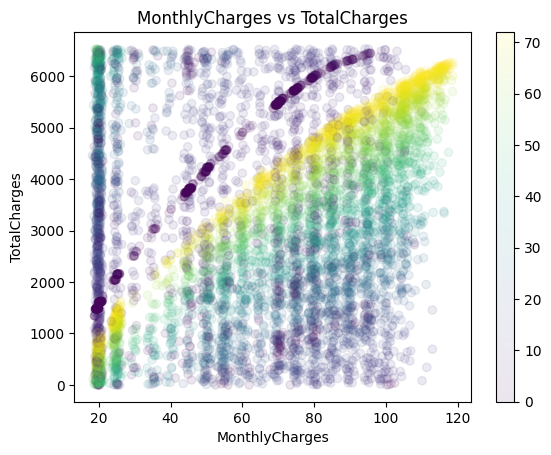

In [8]:
plt.scatter(data['MonthlyCharges'] , data['TotalCharges'] , c= data['tenure'] , alpha = 0.1)
plt.colorbar()
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.title("MonthlyCharges vs TotalCharges")

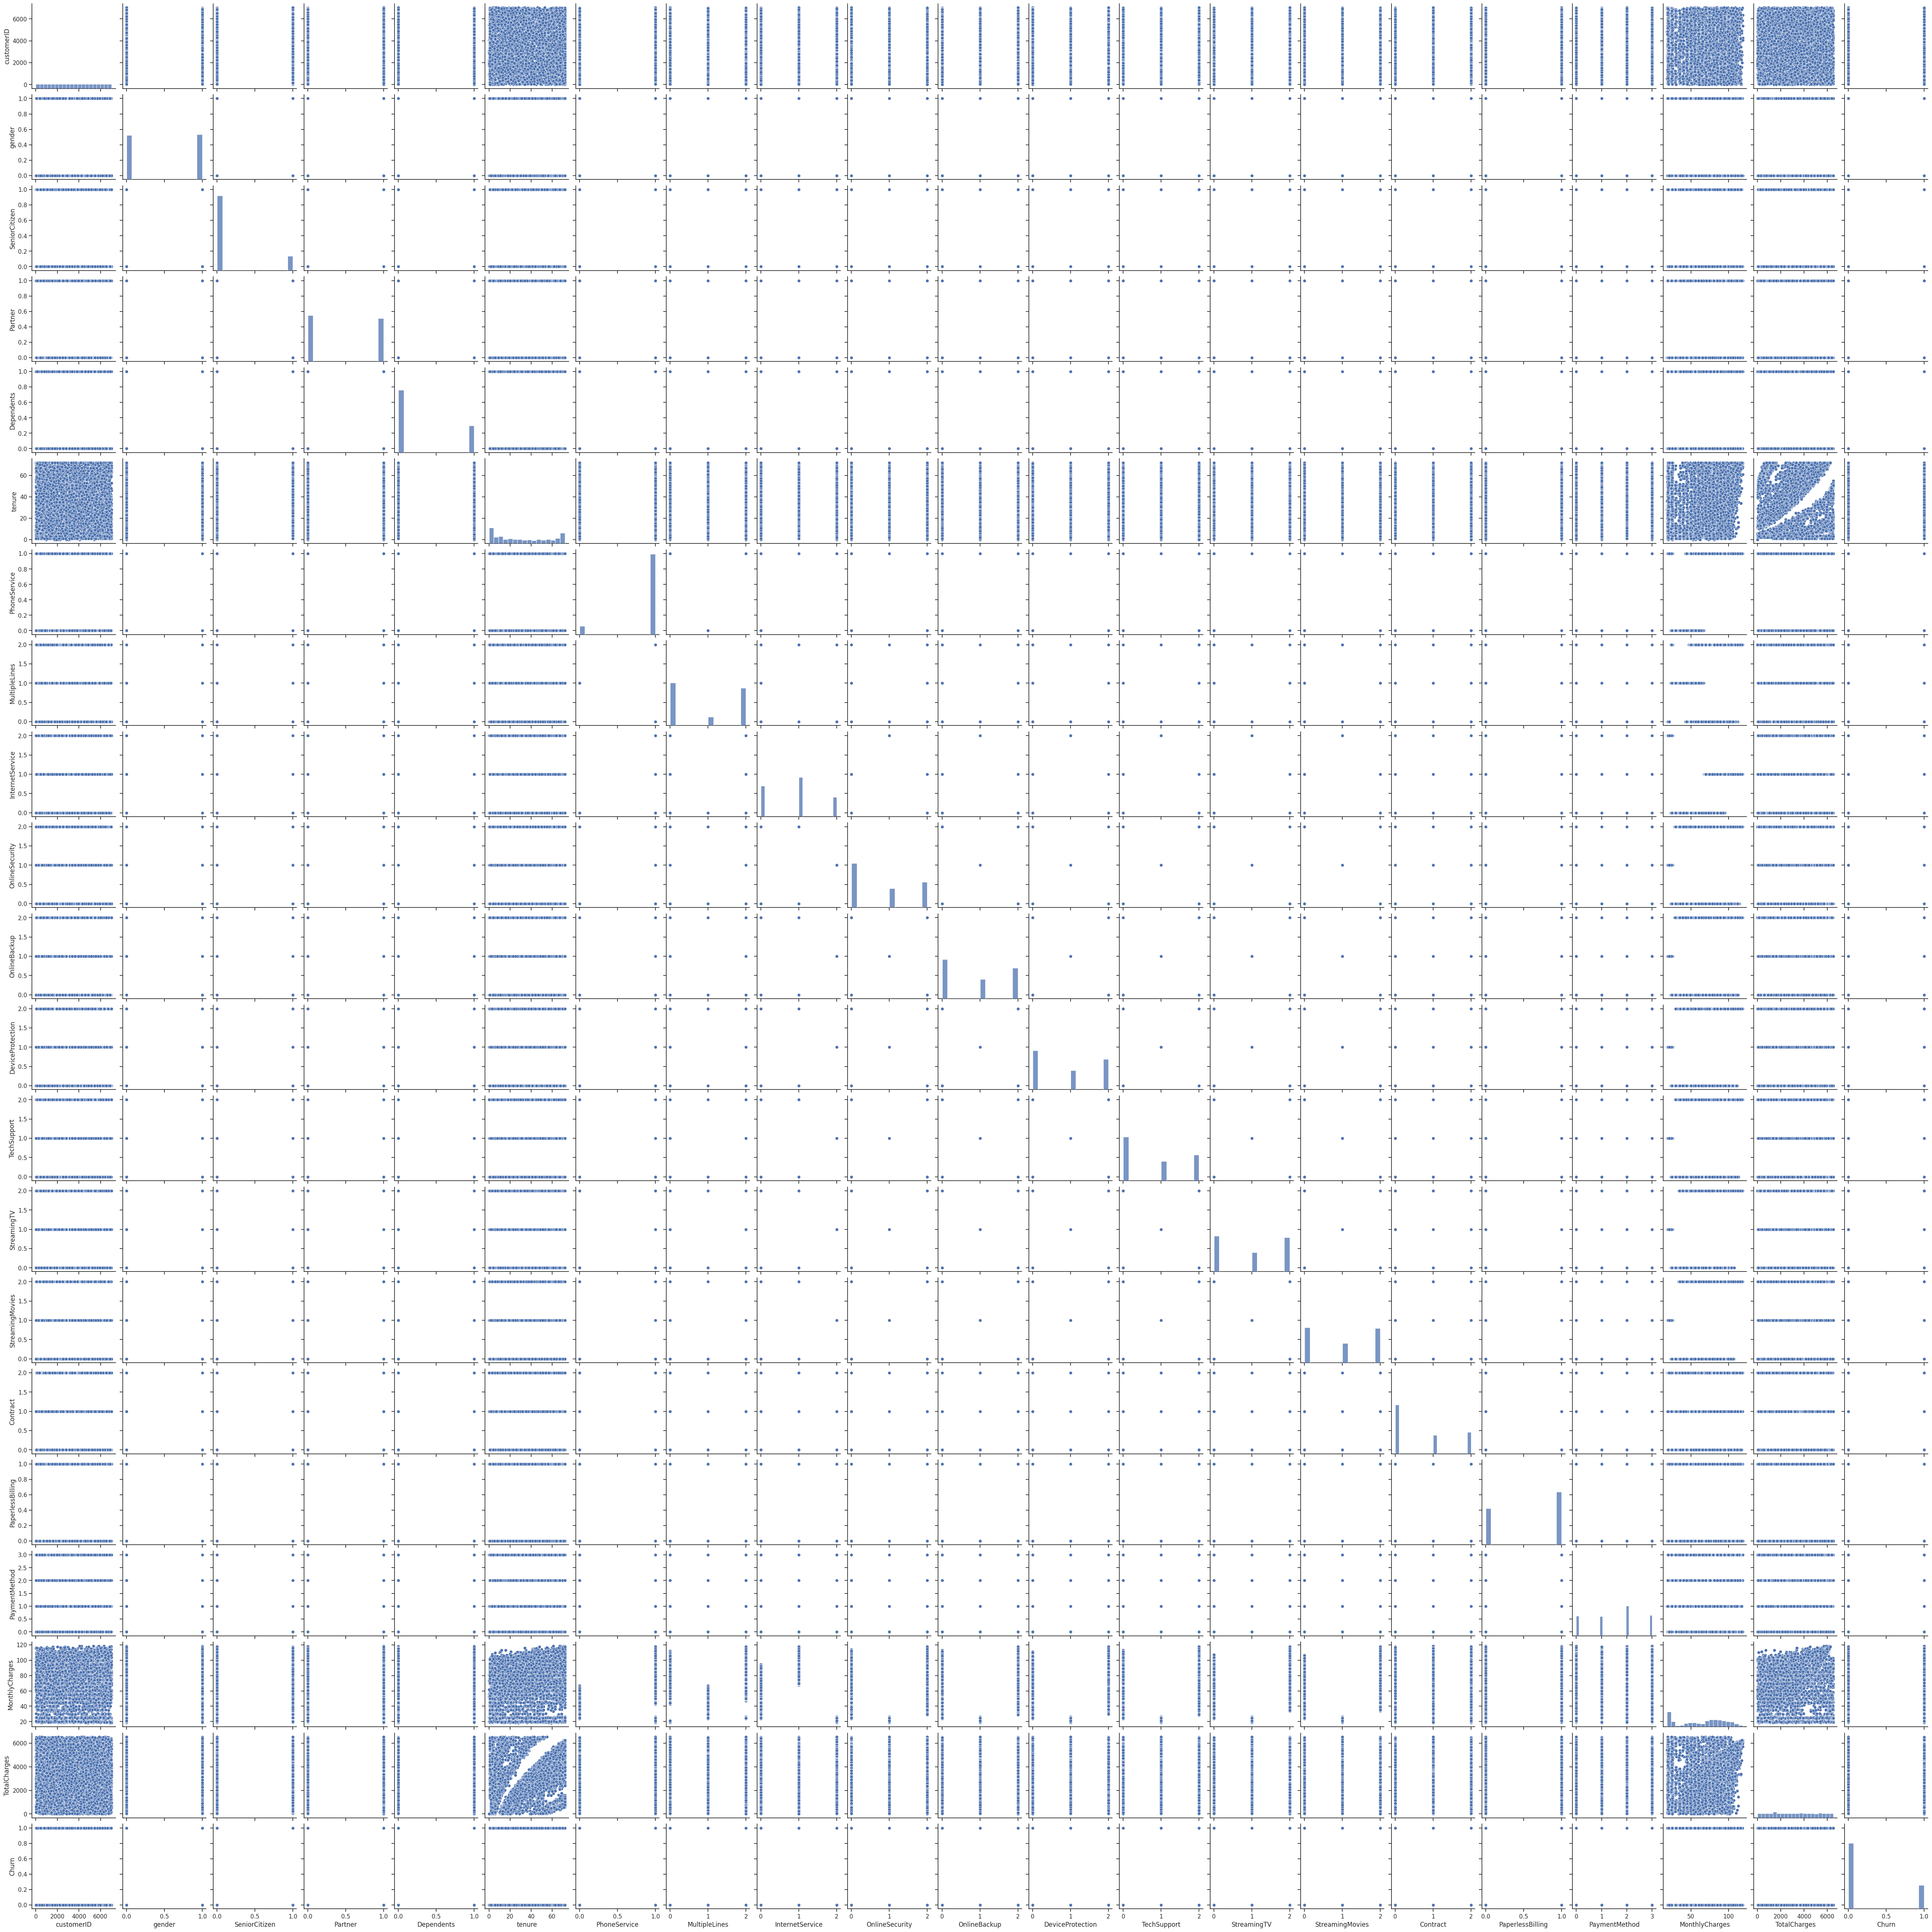

In [26]:
sns.pairplot(data)


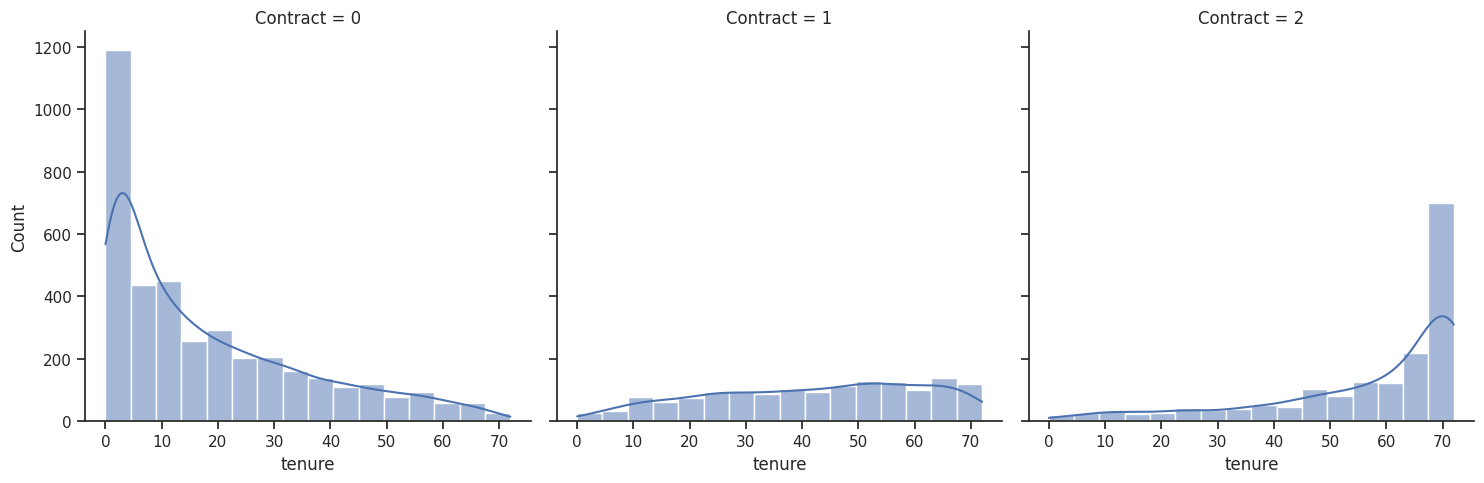

In [27]:
sns.displot(data=data, x="tenure", col="Contract", kde=True)

In [31]:
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

features=["tenure","MonthlyCharges","TotalCharges"]



colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']


def num_summary(dataframe, col):

    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Quantiles','Distribution'))

    fig.add_trace(go.Histogram(x = dataframe[col],
                               xbins = dict(start = dataframe[col].min(),
                                            end = dataframe[col].max()),
                               showlegend = False,
                               name = str(col),
                               marker=dict(color=colors[8],
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 1)

    fig.add_trace(go.Box(y=dataframe[col],
                         name = str(col),
                         showlegend = False,
                         marker_color = colors[3]),
                  row = 1, col = 2)



    fig.update_layout(title = {'text': col,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark")

    iplot(fig)

for i in data[features].columns:
    num_summary(data,i)

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 4000x2000 with 0 Axes>

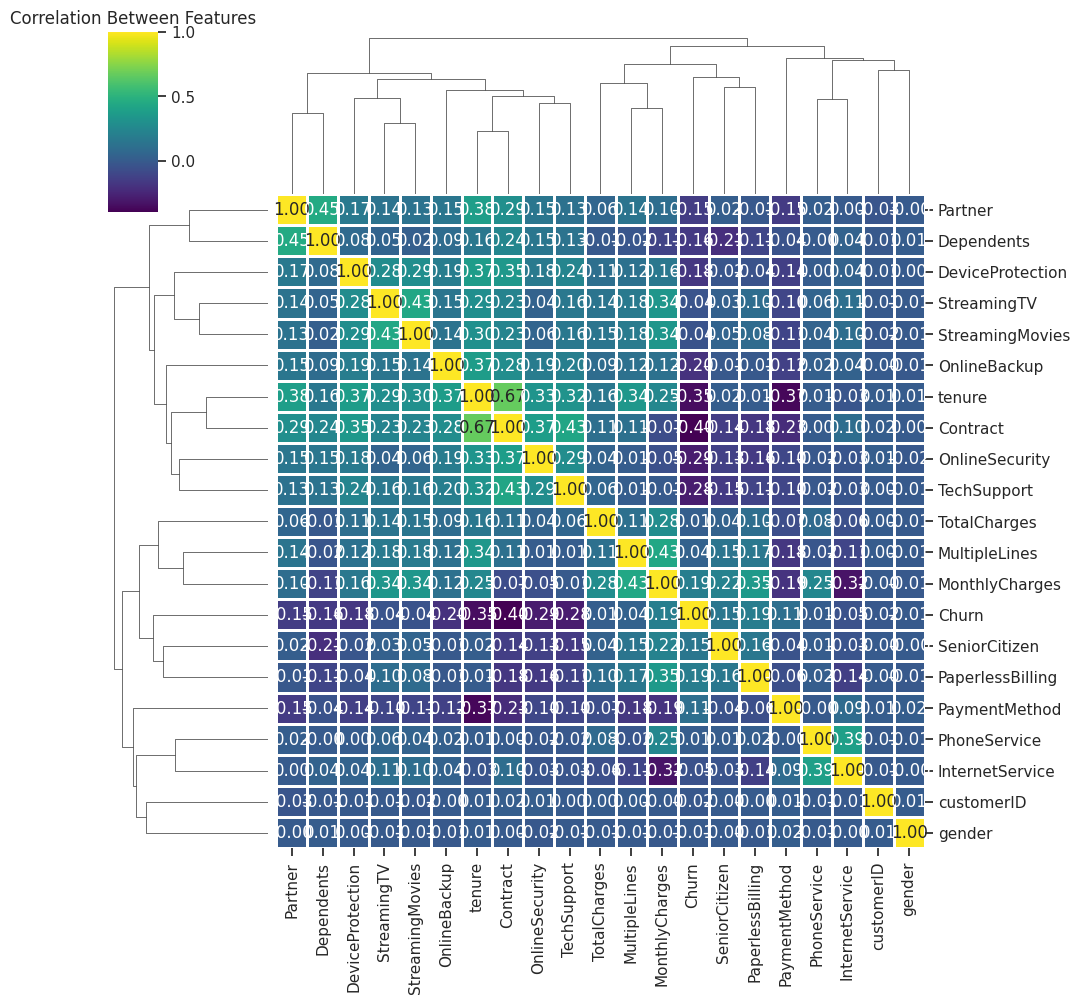

In [85]:
num_cols = data.select_dtypes(include=np.number)

corr=num_cols.corr()
plt.figure(figsize=(40,20))
sns.clustermap(corr,cmap="viridis",linewidths=.75,annot=True,fmt=".2f")
plt.title("Correlation Between Features")

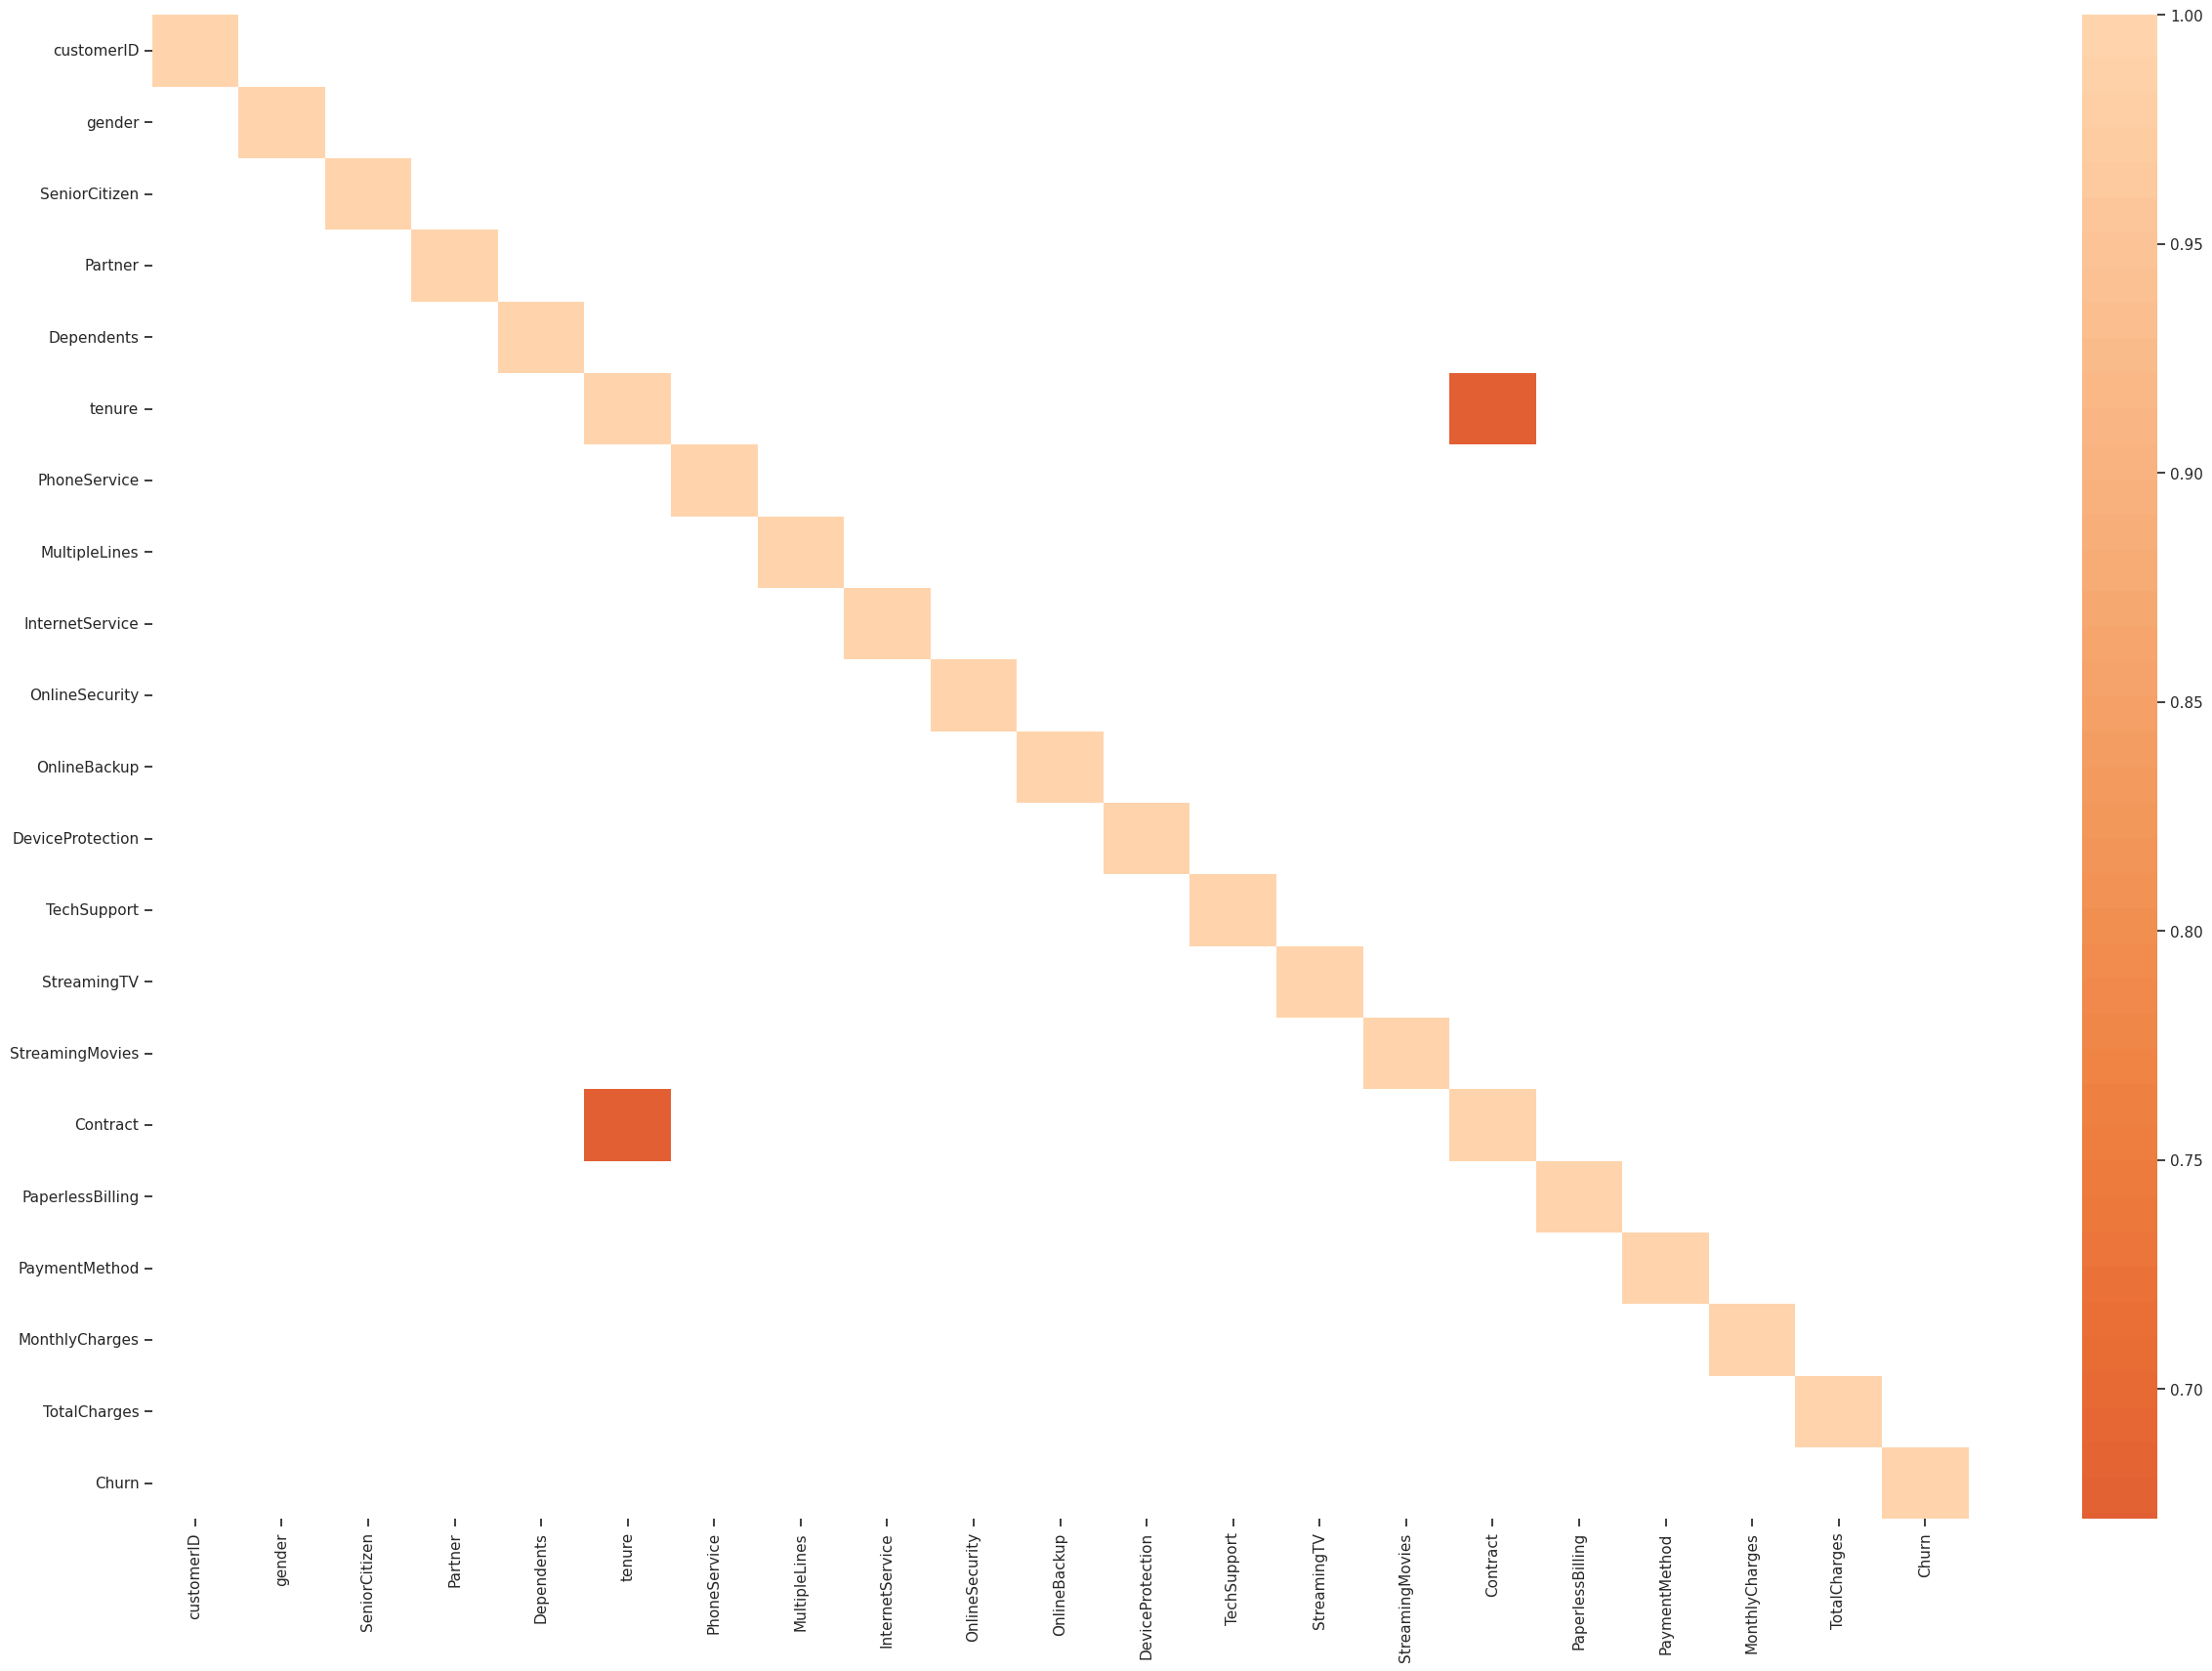

In [81]:
correlation_matrix = data.corr()
mask = correlation_matrix >= 0.5
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=False, mask=~mask, center=0)
plt.show()

In [38]:
import plotly.express as px
px.histogram(data,x="InternetService",color="Churn",title="relationship between InternetService and Churn",template="plotly_dark",opacity=0.8,hover_data=data.columns,
             marginal="box",barmode="group",width=800,height=400,color_discrete_sequence=["#2CD3E1","#A459D1"])

In [39]:
px.scatter(data, x="tenure", y="TotalCharges", color="Churn", marginal_y="violin",
            marginal_x="box", trendline="ols", template="plotly_dark", title="Tenure and TotalCharges",size="MonthlyCharges")

In [41]:
features=["tenure","TotalCharges","MonthlyCharges"]

for i in data[features].columns:
    fig=px.box(data,y=i,color=data["Churn"],title=i,width=500,height=500,template="plotly_dark")
    fig.show()

In [43]:
for model in data:

    print("Model: ",model.__class__.__name__)
    print("Classification Report: \n",classification_report(y_test,y_pred))
    fig=px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
    fig.show()

Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



Model:  str
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [86]:
z = data.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Telecom Communiction Churn', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

Text(0.5, 1.0, 'Scatterplot between Monthly charges and Total Charges\nShowing Linear correlation between them')

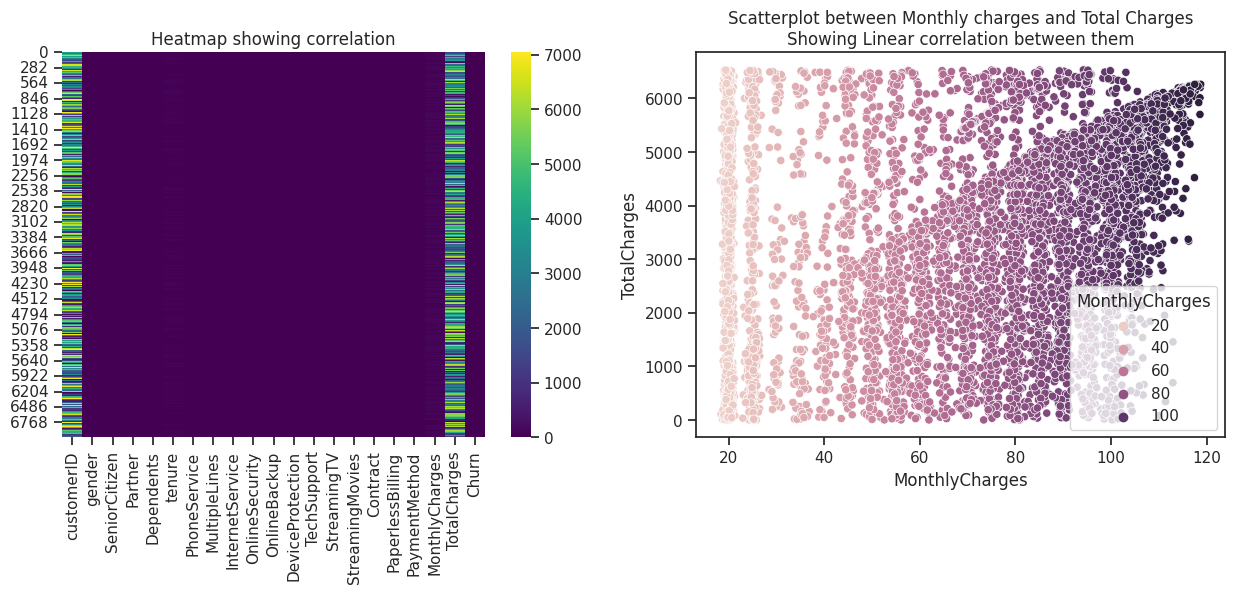

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.heatmap(data, cmap='viridis',ax=ax[0])
ax[0].set_title('Heatmap showing correlation')

sns.scatterplot(x='MonthlyCharges',y='TotalCharges', data=data,ax=ax[1], hue='MonthlyCharges')
ax[1].set_title('Scatterplot between Monthly charges and Total Charges\nShowing Linear correlation between them')

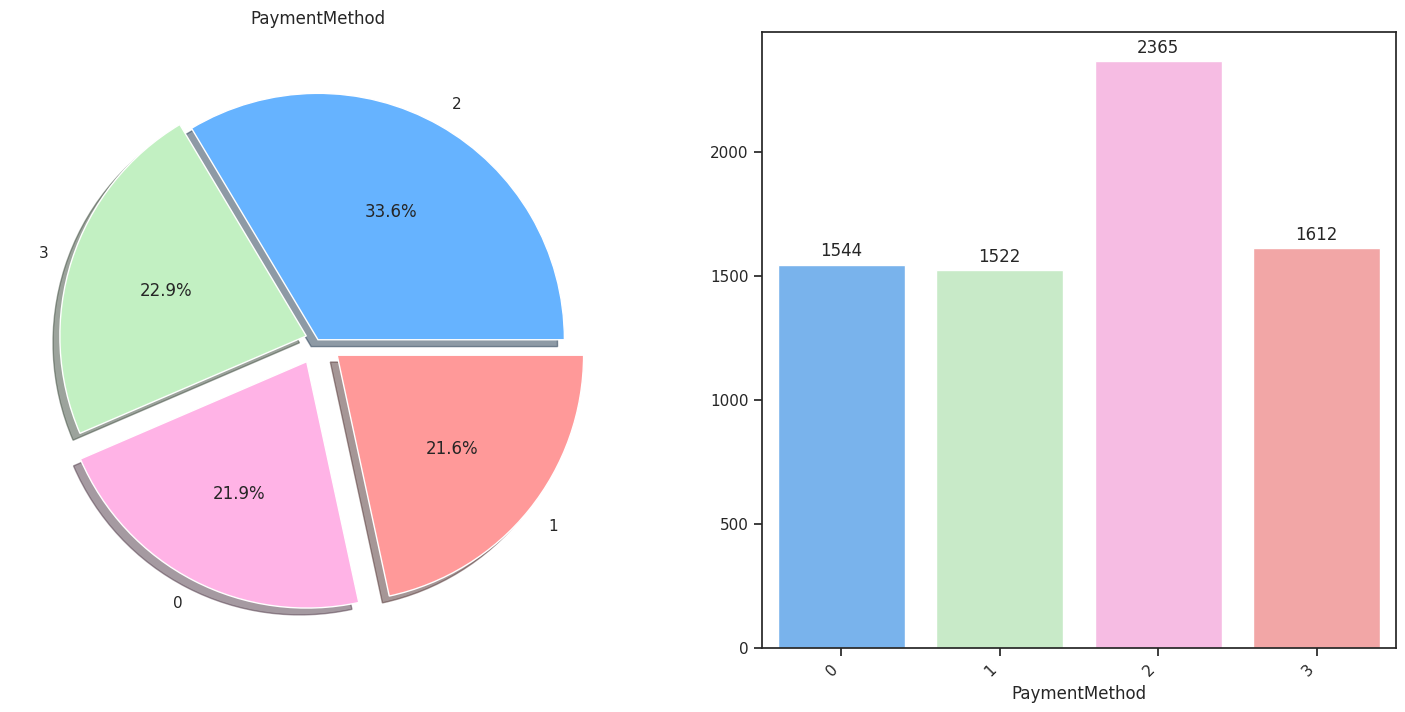

In [78]:
colors = ['#66b3ff', '#c2f0c2', '#ffb3e6', '#ff9999']
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data['PaymentMethod'].value_counts().plot.pie(explode=[0, 0.05, 0.1,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True,  colors=colors)
ax[0].set_title('PaymentMethod')
ax[0].set_ylabel('')


sns.countplot(data=data, x="PaymentMethod",ax=ax[1],  palette=colors)
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')
plt.show()

In [56]:
MultipleLines_count=data['MultipleLines'].value_counts()
plt.figure(figsize=(10,10))
fig = px.pie(data, values=MultipleLines_count, names=MultipleLines_count.index)
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=['aqua', '	yellow','pink'], line=dict(color='green', width=5)))

fig.update_traces(hole=0.5, hoverinfo="label+percent+name")
fig.update_layout(annotations=[dict(text='Multiple Lines', x=0.5, y=0.5, font_size=20, showarrow=False, font_color="black")],
                  paper_bgcolor="lightgreen")
fig.show()

<Figure size 1000x1000 with 0 Axes>

<Figure size 10000x5000 with 0 Axes>

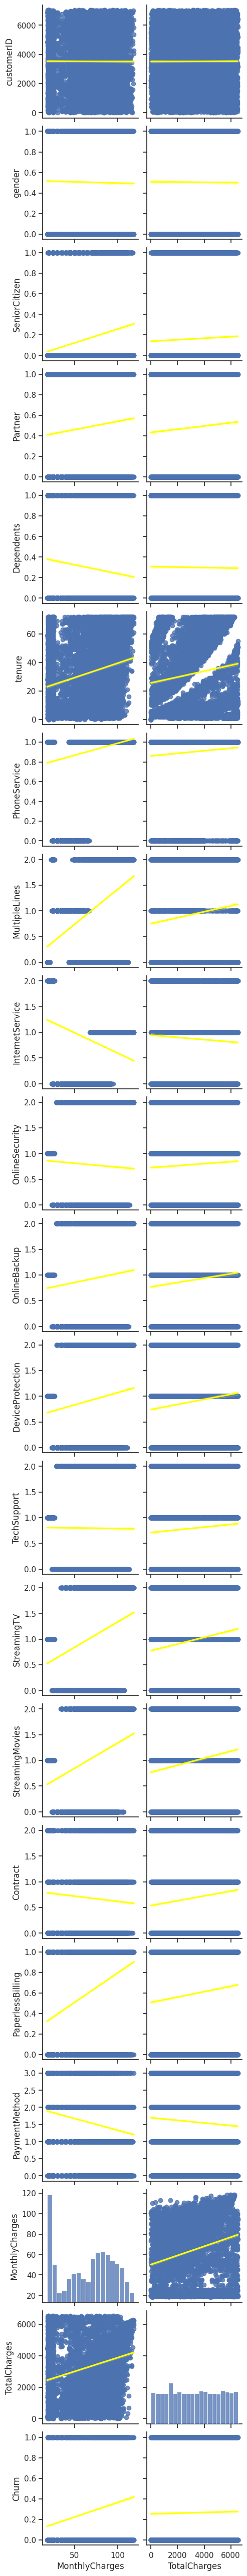

In [58]:
plt.figure(figsize=(100,50))
sns.pairplot(data,
             x_vars=["MonthlyCharges",'TotalCharges'],
            kind="reg",plot_kws={'line_kws':{'color':'yellow'}})

In [ ]:
plotHistogram(data, 10, 5)

In [67]:
class colorss:
    pastel = ['#dbc4e9', '#b4deca', '#ffddd2', '#ffd2b2']
    pastel2 = ['mintcream', 'lavender', 'pink', 'lightyellow']
    pastel3 = ['rgba(179,205,227,0.5)', '#abeced', '#ffd2b2', '#ffe5d9']
    vibrant = ['#8093f1', '#3fc1c9', '#f6d365', '#fda085']
    electric = ['#00FF00', '#FF00FF', '#00FFFF', '#FFFF00']
    neon = ['limegreen', 'neonpink', 'cyan', 'yellow']
    miami = ['hotpink', 'teal', 'lime', 'purple']
    retro = ['#FF69B4', '#008080', '#00FF00', '#9370DB']
    fruit = ['lemonchiffon', 'peachpuff', 'palevioletred', 'mediumseagreen']
    tropical = ['#F0E68C', '#FFDAB9', '#DDA0DD', '#3CB371']
    primary = ['orangered', 'deepskyblue', 'limegreen', 'purple']
    bold = ['#FF4500', '#00BFFF', '#32CD32', '#9370DB']
    earth = ['peru', 'saddlebrown', 'rosybrown', 'sandybrown']
    earthy = ['#CD853F','#8B4513', '#BC8F8F', '#F4A460']
    Boldprimaries = ['navy', 'crimson', 'limegreen', 'gold']
    Neonbrights = ['fuchsia', 'lime', 'cyan', 'yellow']
    fifties = ['coral', 'aquamarine', 'salmon', 'chartreuse']
    eities = ['hotpink', 'skyblue', 'lime', 'plum']
bbox  = {'boxstyle' : 'round',
         'pad': 0.5,
         'facecolor': 'white',
         'edgecolor': 'black',
         'linewidth': 1.5,
         'alpha': 1}

<ipython-input-64-b704dbd21ae9>:2: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



<Axes: title={'center': 'Monthly Charges distribution'}, xlabel='MonthlyCharges', ylabel='Density'>

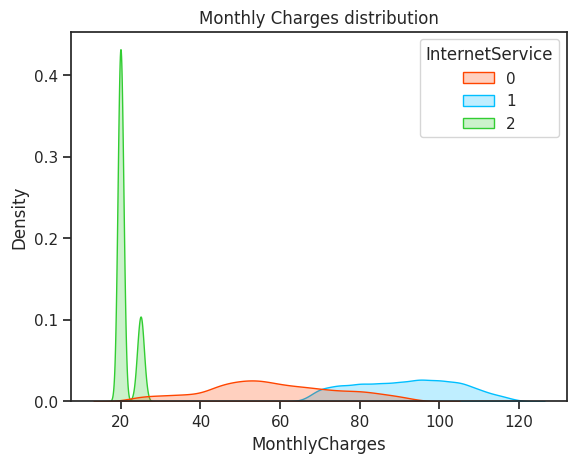

In [64]:
plt.title("Monthly Charges distribution")
sns.kdeplot(data, x="MonthlyCharges", hue="InternetService",fill=True, common_norm=False,palette=colorss.bold)

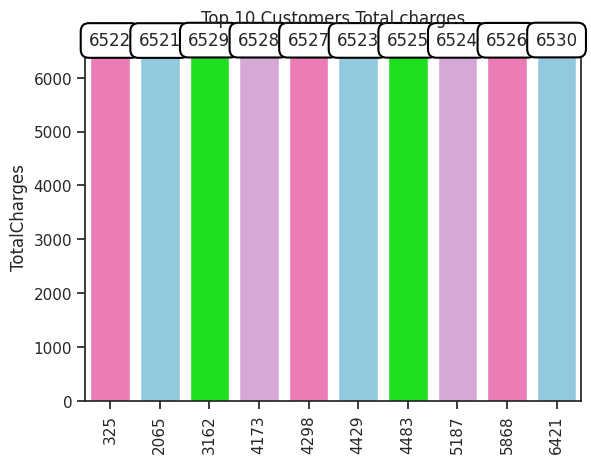

In [68]:
total = data.groupby('customerID')['TotalCharges'].sum().round().reset_index().sort_values('TotalCharges', ascending=False).head(10)
p1=sns.barplot(data=total, x='customerID', y='TotalCharges',palette=colorss.eities)
p1.bar_label(p1.containers[0], bbox = bbox)
plt.title('Top 10 Customers Total charges')
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

<ipython-input-69-446f59a75ab7>:2: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



<Axes: title={'center': 'Monthly Charges distribution'}, xlabel='MonthlyCharges', ylabel='Density'>

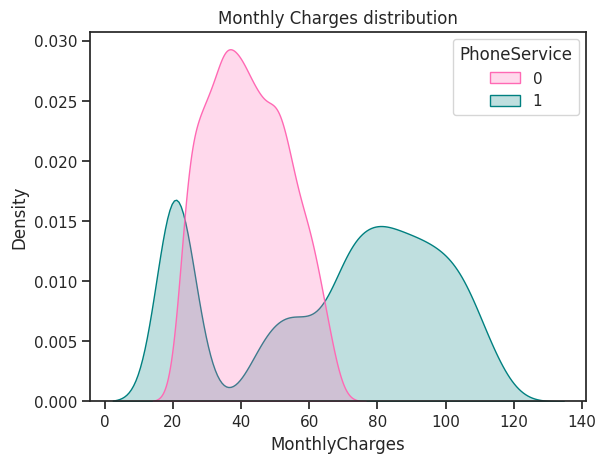

In [69]:
plt.title("Monthly Charges distribution")
sns.kdeplot(data, x="MonthlyCharges", hue="PhoneService",fill=True, common_norm=False,palette=colorss.retro)

In [71]:
fig = px.histogram(data, x="MonthlyCharges",marginal="violin", hover_data=data.columns)
fig.update_traces(opacity=0.5)
fig.show()

In [74]:
plt.figure(figsize=(10,10))
fig = px.scatter_matrix(data,
    dimensions=[ 'MonthlyCharges', 'TotalCharges' , 'tenure'],
    color="Churn",color_continuous_scale=colorss.vibrant)
fig.show()

<Figure size 1000x1000 with 0 Axes>

# **Conclusion: Churn Prediction Analysis**

In this comprehensive churn prediction analysis, we delved into a dataset containing customer information to develop a model capable of identifying customers who are most likely to churn. Through a structured approach encompassing exploratory data analysis, data preprocessing, model building, evaluation, and feature importance analysis, we have gained valuable insights that can drive actionable business decisions.

**Key Findings:**

The exploratory data analysis revealed valuable information about the distribution of customer attributes and the prevalence of churn in the dataset.
By encoding categorical variables and splitting the data into training and testing sets, we prepared the data for model training and evaluation.
The Random Forest Classifier exhibited strong predictive capabilities, effectively capturing patterns in the data to predict customer churn.
Evaluation metrics, including the confusion matrix, precision, recall, and F1-score, provided a comprehensive view of the model's performance.

**Business Impact:**

The predictive model equips businesses with a tool to proactively identify customers who are at risk of churning. This enables timely intervention strategies to retain valuable customers.
Insights from the feature importance analysis offer a deeper understanding of the factors that significantly influence churn. This knowledge empowers organizations to tailor retention efforts and address specific pain points.

**Recommendations:**

Leverage the predictive model to prioritize customer retention efforts. Focus on customers identified as high-risk churn candidates.
Utilize the insights from feature importance to design targeted initiatives. Addressing key factors such as tenure, internet services, and contract type can enhance customer satisfaction and loyalty.
Continuously monitor the model's performance and refine it as new data becomes available. Regular updates and improvements ensure accurate predictions over time.

**Limitations and Future Directions:**

While our analysis provides valuable insights, real-world applications may involve additional complexities and challenges not captured in the dataset.
Exploring advanced modeling techniques and tuning hyperparameters could potentially further enhance model performance.
Incorporating external data sources or time-series analysis could offer a more comprehensive understanding of customer behavior and churn dynamics.


In conclusion, this churn prediction analysis demonstrates the power of data-driven decision-making in managing customer retention. By proactively identifying potential churners and implementing tailored strategies, businesses can foster stronger customer relationships, improve customer satisfaction, and drive sustainable growth.